# Algorithme inspiré de la méthode de Kaczmarz pour résoudre un système linéaire

Ce programme implémente une version modifiée de la méthode de Kaczmarz pour trouver la solution d'un système linéaire. Après chaque itération de mise à jour des inconnues, une moyenne des résultats intermédiaires est calculée pour accélérer la convergence.

## Détails du programme

Le programme utilise une matrice `A` et un vecteur `b`, représentant le système linéaire à résoudre \(Ax = b\), ainsi qu'un vecteur `x` initialisé aléatoirement. Il applique une variation de la méthode de Kaczmarz, en itérant sur chaque ligne de `A`, pour ajuster les valeurs du vecteur solution `x`.

## Code Python

Code 100% moi a corriger

In [1]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Random initialization of vector x
x = np.random.rand(3)

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.9

#fait la formule de kacmarz pour rouver 1x
def KacZmarz(matrice_A, matrice_b, inconnue):
    Transpose_a = 0
    Norm = 0
    for i,A in enumerate(matrice_A):
        Transpose_a += A * inconnue[i]
        Norm += A * A

    atixi = (matrice_b - Transpose_a) / Norm
    for i,A in enumerate(matrice_A):
        inconnue[i] = inconnue[i] + atixi * A
    return inconnue

def kaxZmarz():
    all_inconnue = []
    for i in range(len(x)):
        all_inconnue.append(KacZmarz(A[i], b[i], x))
    for ligne in range(len(all_inconnue[0])):
        #for inco in range(len(inconnue_average[0])):
        print(all_inconnue[ligne])


kaxZmarz()

[0.82203875 0.76025214 0.4725697 ]
[0.82203875 0.76025214 0.4725697 ]
[0.82203875 0.76025214 0.4725697 ]


une implémntation factuellement juste mes a optimiser

Initial random x: [0.34987076 0.77155451 0.28416893]
Convergence atteinte après 111 itérations.
La solution finale (x, y, z) est : [0.50000822 0.9999933  0.4999967 ]


In [ ]:
import numpy as np

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Random initialization of vector x
x = np.random.rand(3)
print("Initial random x:", x)

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000

# Pré-calcul de la norme de chaque ligne de la matrice A (évitant de recalculer à chaque itération)
norms = np.sum(A ** 2, axis=1)


# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    # Produit scalaire entre A_row et x (A_row.dot(x))
    Transpose_a = np.dot(A_row, inconnue)

    # Mise à jour de x selon l'algorithme de Kaczmarz
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row  # Mise à jour de chaque inconnue

    return inconnue


# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)  # Initialiser une nouvelle matrice pour stocker les résultats

    # Appliquer Kaczmarz à chaque ligne de A
    # En en addtiotn tout les valeur de x,y,z dans le même tuple
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])

    # Retourner la moyenne des résultats avec numpy en divianst le tuple all_inconnue par le nombre de valeur
    return all_inconnue / len(A)


# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x_copy = x.copy()  # Initialisation des inconnues
    x_old = np.zeros_like(x_copy)  # Conserver l'ancienne version de x pour la convergence

    for iteration in range(max_iterations):
        x_old[:] = x_copy  # Conserver l'ancienne itération pour vérification de la convergence

        # Effectuer une itération complète sur toutes les équations
        x_copy = Kaczmarz_one_loop(x_copy)

        # Vérification de la convergence
        if convergence(x_copy, x_old):
            print(f"Convergence atteinte après {iteration + 1} itérations.")
            break

    return x_copy


# Fonction de convergence
def convergence(inconnue, x_old):
    # Vérification de la différence entre l'ancienne et la nouvelle valeur de x
    return np.linalg.norm(inconnue - x_old) < tolerance


# Exécution de Kaczmarz et vérification de la convergence
final_inconnue = Kaczmarz()

print("La solution finale (x, y, z) est :", final_inconnue)

# juste optimiser mais a verifier

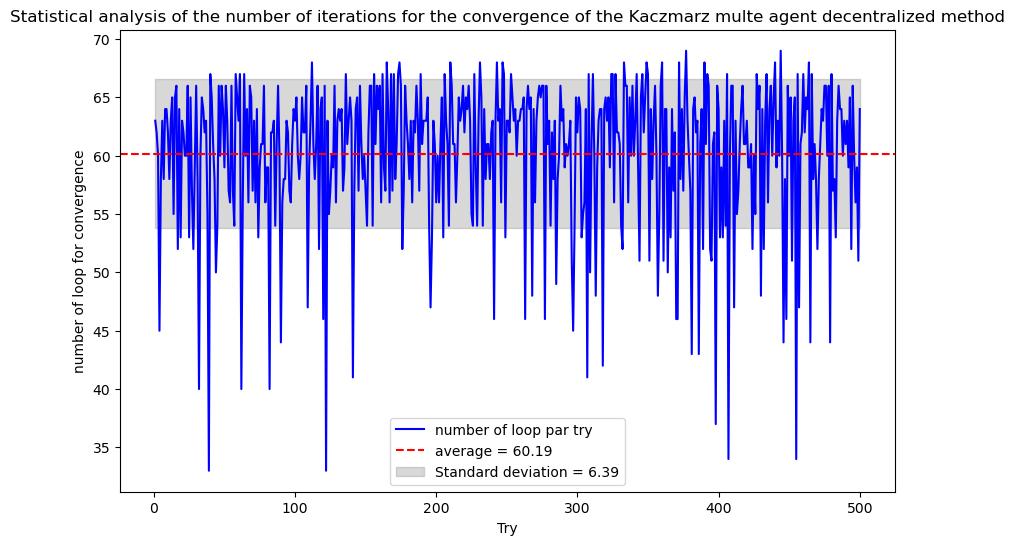

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000

# Pré-calcul de la norme de chaque ligne de la matrice A
norms = np.sum(A ** 2, axis=1)

# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    Transpose_a = np.dot(A_row, inconnue)
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row
    return inconnue

# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
    return all_inconnue / len(A)

# Fonction de convergence
def convergence(inconnue, x_old):
    return np.linalg.norm(inconnue - x_old) < tolerance

# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x = np.random.rand(3)  # Initialisation aléatoire des inconnues à chaque appel
    x_old = np.zeros_like(x)  # Conserver l'ancienne version de x pour la convergence

    for iteration in range(max_iterations):
        x_old[:] = x  # Conserver l'ancienne itération pour vérification de la convergence
        x = Kaczmarz_one_loop(x)

        if convergence(x, x_old):
            return x, iteration + 1  # Retourner la solution finale et le nombre d'itérations

    return x, max_iterations  # Si la convergence n'est pas atteinte

# Boucle pour calculer le nombre moyen d'itérations
num_repetitions = 500  # Nombre de répétitions pour calculer la moyenne
iterations_needed = []

for _ in range(num_repetitions):
    _, iterations = Kaczmarz()  # Exécute Kaczmarz et obtient le nombre d'itérations
    iterations_needed.append(iterations)

# Calcul des indicateurs statistiques
average_iterations = np.mean(iterations_needed)
std_dev_iterations = np.std(iterations_needed)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_repetitions + 1), iterations_needed, label="number of loop par try", color='blue')
plt.axhline(average_iterations, color='red', linestyle='--', label=f"average = {average_iterations:.2f}")
plt.fill_between(
    range(1, num_repetitions + 1),
    average_iterations - std_dev_iterations,
    average_iterations + std_dev_iterations,
    color='gray', alpha=0.3,
    label=f"Standard deviation = {std_dev_iterations:.2f}"
)

# Ajout de titres et légendes
plt.xlabel("Try")
plt.ylabel("number of loop for convergence")
plt.title("Statistical analysis of the number of iterations for the convergence of the Kaczmarz multe agent decentralized method")
plt.legend()
plt.show()


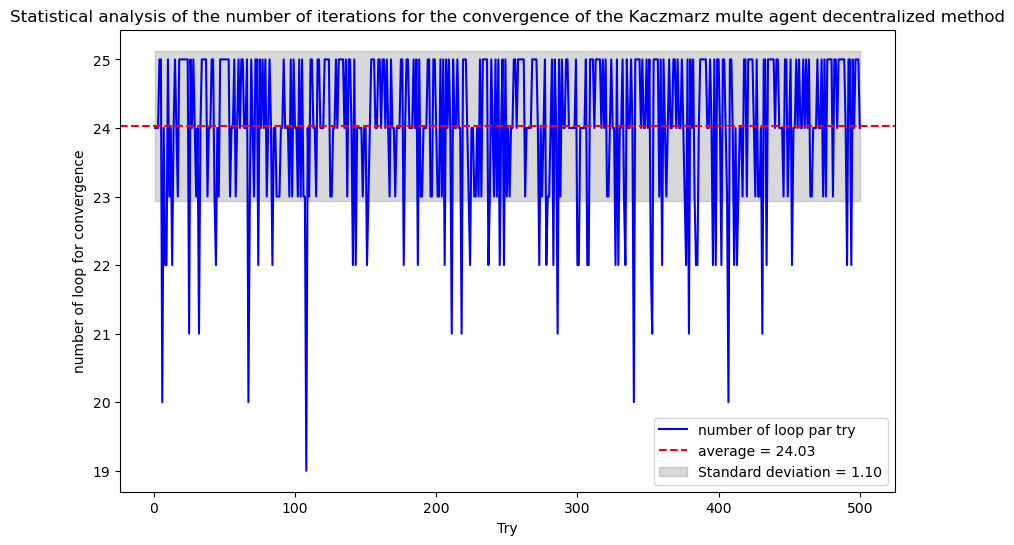

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Matrix A and vector b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Parameters for the algorithm
tolerance = 1e-6
max_iterations = 10000
alpha = 0.5  # Relaxation parameter (to be adjusted as needed)
beta = 0.1  # Momentum parameter (to be adjusted as needed)

# Pré-calcul de la norme de chaque ligne de la matrice A
norms = np.sum(A ** 2, axis=1)

# Fonction Kaczmarz pour résoudre 1x
def Kaczmarz_one_iteration(A_row, b_value, inconnue, norm):
    Transpose_a = np.dot(A_row, inconnue)
    atixi = (b_value - Transpose_a) / norm
    inconnue += atixi * A_row
    return inconnue

# Fonction pour exécuter une itération de Kaczmarz sur toutes les équations
def Kaczmarz_one_loop(inconnue):
    all_inconnue = np.zeros_like(inconnue)
    for i in range(len(A)):
        all_inconnue += Kaczmarz_one_iteration(A[i], b[i], inconnue, norms[i])
    return all_inconnue / len(A)

# Fonction de convergence
def convergence(inconnue, x_old):
    return np.linalg.norm(inconnue - x_old) < tolerance

# Fonction principale de l'algorithme avec contrôle de convergence
def Kaczmarz():
    x = np.random.rand(3)  # Initialisation aléatoire des inconnues
    x_old = np.zeros_like(x)  # Conserver l'ancienne version de x pour la convergence
    momentum = np.zeros_like(x)  # Pour ajouter le momentum

    for iteration in range(max_iterations):
        x_old[:] = x  # Conserver l'ancienne itération pour vérification de la convergence
        update = Kaczmarz_one_loop(x)
        
        # Ajout de relaxation et de momentum dans la mise à jour de x
        new_x = (1 - alpha) * x + alpha * update
        x = new_x + beta * momentum  # Applique le momentum
        
        # Met à jour le momentum
        momentum = x - x_old
        
        if convergence(x, x_old):
            return x, iteration + 1  # Retourner la solution finale et le nombre d'itérations

    return x, max_iterations  # Si la convergence n'est pas atteinte

# Boucle pour calculer le nombre moyen d'itérations
num_repetitions = 500  # Nombre de répétitions pour calculer la moyenne
iterations_needed = []

for _ in range(num_repetitions):
    _, iterations = Kaczmarz()  # Exécute Kaczmarz et obtient le nombre d'itérations
    iterations_needed.append(iterations)

# Calcul des indicateurs statistiques
average_iterations = np.mean(iterations_needed)
std_dev_iterations = np.std(iterations_needed)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_repetitions + 1), iterations_needed, label="number of loop par try", color='blue')
plt.axhline(average_iterations, color='red', linestyle='--', label=f"average = {average_iterations:.2f}")
plt.fill_between(
    range(1, num_repetitions + 1),
    average_iterations - std_dev_iterations,
    average_iterations + std_dev_iterations,
    color='gray', alpha=0.3,
    label=f"Standard deviation = {std_dev_iterations:.2f}"
)

# Ajout de titres et légendes
plt.xlabel("Try")
plt.ylabel("number of loop for convergence")
plt.title("Statistical analysis of the number of iterations for the convergence of the Kaczmarz multe agent decentralized method")
plt.legend()
plt.show()
